# Principal Component Analysis 

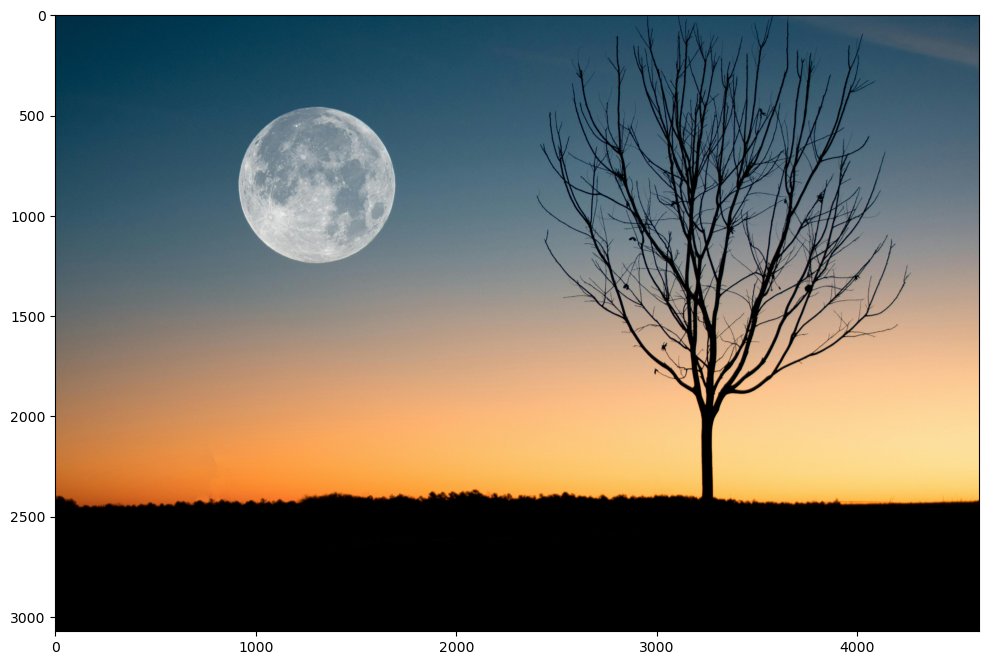

In [28]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

image_raw = imread('pexels-david-besh-884788.jpg')

#Disply the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)

(3072, 4608)
1.0


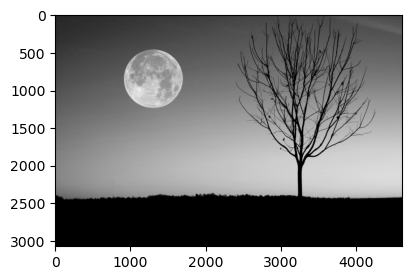

In [5]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12,3])
plt.imshow(image_bw,cmap=plt.cm.gray)

Number of components explaining 95% variance: 0


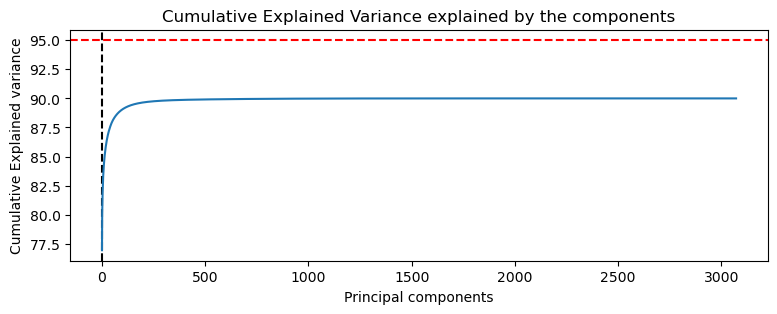

In [7]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*90

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[9,3])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

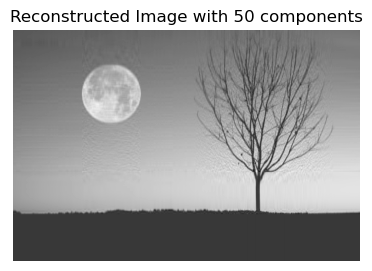

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA

# Assuming 'image_bw' is your input image in grayscale, possibly as a 2D NumPy array
# Example: image_bw = np.array(...)  # Load your grayscale image

# Set the number of components for IncrementalPCA
k = 50  # Choose the number of components to retain

# Initialize IncrementalPCA with the number of components
ipca = IncrementalPCA(n_components=k)

# Apply IncrementalPCA and then reconstruct the image
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[12, 3])
plt.imshow(image_recon, cmap=plt.cm.gray)
plt.title(f'Reconstructed Image with {k} components')
plt.axis('off')
plt.show()

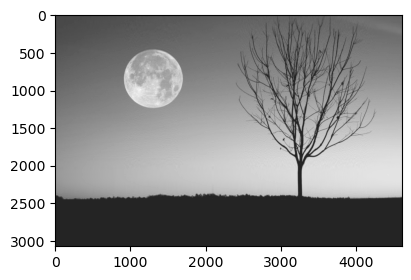

In [23]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
# Plotting the reconstructed image
plt.figure(figsize=[12,3])
plt.imshow(image_recon,cmap = plt.cm.gray)

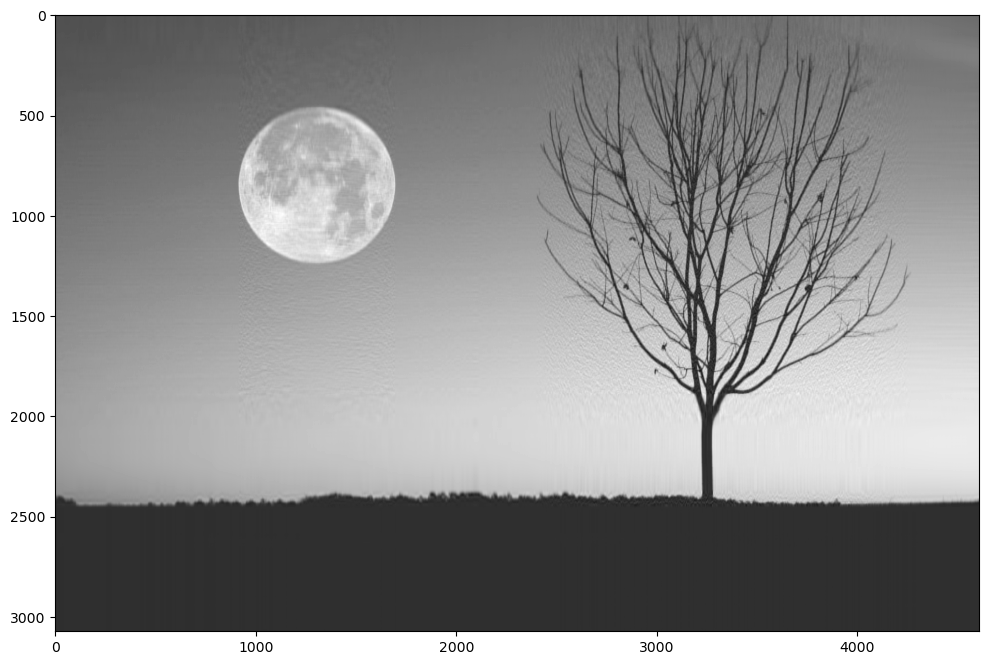

In [35]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)
    

k = 150
plt.figure(figsize=[12,8])
plot_at_k(100)

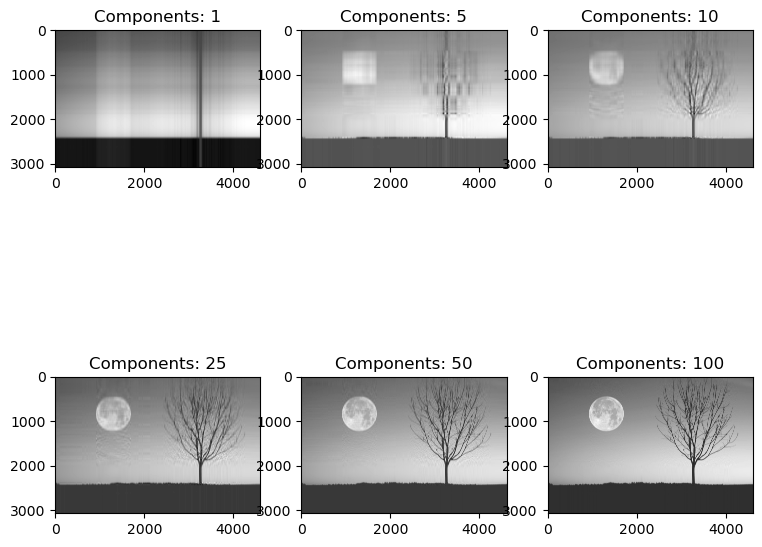

In [46]:
ks = [1, 5, 10, 25, 50, 100]

plt.figure(figsize=[9,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()